In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.ticker import PercentFormatter
import folium
import json
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl
import matplotlib.ticker as ticker



C:\Users\Andy\AppData\Local\Temp\ipykernel_26508\3534520126.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
world_geo = r'c:\Users\Andy\Desktop\CareerFoundry tasks\Chocolate Data Set\world-countries.json'

In [ ]:
f = open(r'c:\Users\Andy\Desktop\CareerFoundry tasks\Chocolate Data Set\world-countries.json')

data = json.load(f)

for i in data['features']:
    print(i)

In [4]:
path = r'e:\Chocolate Data Set'

In [5]:
path

'e:\\Chocolate Data Set'

In [6]:
cacao_fl = pd.read_csv(os.path.join(path, r'e:\Chocolate Data Set\flavors_of_cacao.csv'))


#Performing Data consistency checks

In [7]:
cacao_fl.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [8]:
#check for duplicate rows
cacao_fl.duplicated().sum()

0

In [9]:
# Assuming 'cacao_fl' is your DataFrame
data_types = cacao_fl.dtypes
print(data_types)

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object


Renaming Columns

In [10]:
# Replace 'cacao_fl' with the name of your DataFrame
cacao_fl.rename(columns={'Cocoa\nPercent': 'Cocoa_Percent'}, inplace=True)

In [11]:
# Replace 'cacao_fl' with the name of your DataFrame
cacao_fl.rename(columns={'Company\nLocation': 'Company_Location'}, inplace=True)

In [12]:
# Replace 'cacao_fl' with the name of your DataFrame
cacao_fl.rename(columns={'Bean\nType': 'Bean_Type'}, inplace=True)

In [13]:
# Replace 'cacao_fl' with the name of your DataFrame
cacao_fl.rename(columns={'Company \n(Maker-if known) ': 'Company'}, inplace=True)

In [14]:
# Replace 'cacao_fl' with the name of your DataFrame
cacao_fl.rename(columns={'Broad Bean\nOrigin': 'Broad_Bean_Origin '}, inplace=True)

In [15]:
# Replace 'cacao_fl' with the name of your DataFrame
cacao_fl.rename(columns={'Review\nDate': 'Review_Date'}, inplace=True)

In [16]:
# Replace 'cacao_fl' with the name of your DataFrame
cacao_fl.rename(columns={'Specific Bean Origin\nor Bar Name': 'Specific_Bean_Origin_or_Bar_Name'}, inplace=True)

In [17]:
# Replace 'cacao_fl' with the name of your DataFrame
cacao_fl.rename(columns=lambda x: x.replace('\n(Maker-if known)', ' '), inplace=True)

Converting object to float dtype since it is a percentage value.

In [18]:
# Convert "Cocoa Percent" column to numeric after removing '%' sign and converting to float
cacao_fl['Cocoa_Percent'] = cacao_fl['Cocoa_Percent'].str.replace('%', '').astype(float)

In [19]:
# Now convert float to integer (if needed)
cacao_fl['Cocoa_Percent'] = cacao_fl['Cocoa_Percent'].astype(int)

In [20]:
data_types = cacao_fl.dtypes
print(data_types)

Company                              object
Specific_Bean_Origin_or_Bar_Name     object
REF                                   int64
Review_Date                           int64
Cocoa_Percent                         int32
Company_Location                     object
Rating                              float64
Bean_Type                            object
Broad_Bean_Origin                    object
dtype: object


In [21]:
cacao_fl.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru


In [22]:
cacao_fl.describe()

,REF,Review_Date,Cocoa_Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.696379,3.185933
std,552.886365,2.927210,6.323389,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


In [23]:
cacao_fl.value_counts()

Company                     Specific_Bean_Origin_or_Bar_Name  REF   Review_Date  Cocoa_Percent  Company_Location  Rating  Bean_Type   Broad_Bean_Origin 
A. Morin                    Agua Grande                       1876  2016         63             France            3.75                Sao Tome              1
Kto                         Belize                            1422  2014         72             U.S.A.            3.00    Trinitario  Belize                1
Olive and Sinclair          Dark 67                           457   2009         67             U.S.A.            2.75                Ghana, Domin. Rep     1
Oialla by Bojessen (Malmo)  Sylvestre, Oialla                 761   2011         70             Germany           3.50    Criollo     Bolivia               1
Ohiyo                       Tanzania                          1598  2015         70             U.S.A.            3.00                Tanzania              1
                                                         

Checking if Cocoa percentage doesn't go over 100%

In [24]:
cacao_fl['Cocoa_Percent'].max()

100

What is the distribution of chocolate ratings across different cocoa percentages?

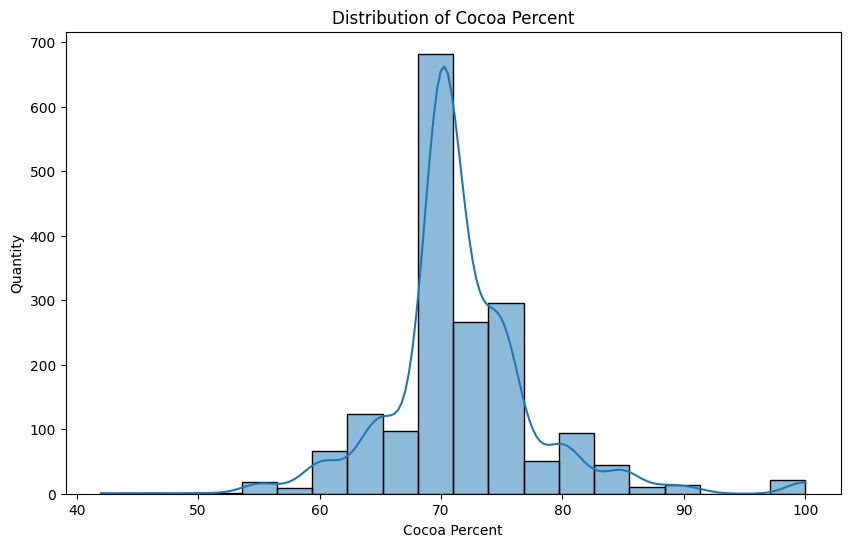

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cacao_fl, x="Cocoa_Percent", bins=20, kde=True)
plt.title("Distribution of Cocoa Percent")
plt.xlabel("Cocoa Percent")
plt.ylabel("Quantity")
plt.show()

How does the regional origin of chocolate relate to its flavor ratings?

In [26]:
category_mapping = {
    'South America': ['Venezuela', 'Ecuador', 'Peru', 'Brazil', 'Bolivia', 'Colombia', 'Guyana', 'Suriname'],
    'Central America': ['Mexico', 'Guatemala', 'Nicaragua', 'Costa Rica', 'Belize', 'Honduras', 'El Salvador', 'Panama'],
    'Caribbean': ['Dominican Republic', 'Jamaica', 'Trinidad', 'Cuba', 'Haiti', 'St. Lucia', 'Grenada', 'Martinique', 'Barbados', 'Bahamas', 'Dominica', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda'],
    'Africa': ['Madagascar', 'Ghana', 'Tanzania', 'Ivory Coast', 'Uganda', 'Sao Tome', 'Cameroon', 'Nigeria', 'Gabon', 'Liberia', 'Congo'],
    'Asia': ['Vietnam', 'Indonesia', 'Sri Lanka', 'Philippines', 'India', 'Malaysia', 'Thailand', 'Myanmar', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu'],
    'Pacific': ['Hawaii', 'Fiji', 'Australia', 'New Zealand', 'Samoa', 'Tonga']
}

In [27]:
# Create a new column 'Region' by mapping the origins to broader categories
cacao_fl['Region'] = cacao_fl['Broad_Bean_Origin '].apply(lambda origin: next((category for category, origins in category_mapping.items() if origin in origins), 'Other'))

In [28]:
# Group the data by 'Region' and calculate the average rating
avg_rating_by_region = cacao_fl.groupby('Region')['Rating'].mean().reset_index()

In [29]:
# Sort the data by average rating
avg_rating_by_region = avg_rating_by_region.sort_values(by='Rating', ascending=False)

C:\Users\Andy\AppData\Local\Temp\ipykernel_32276\1286466560.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Region', data=avg_rating_by_region, ci=None)


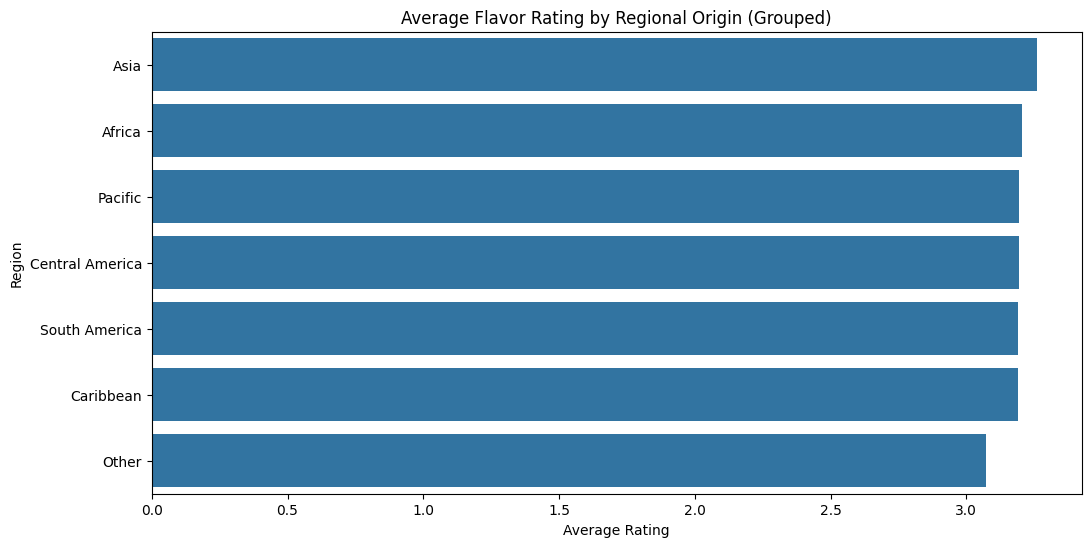

In [30]:
# Plot the average flavor ratings by regional origin
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Region', data=avg_rating_by_region, ci=None)
plt.title("Average Flavor Rating by Regional Origin (Grouped)")
plt.xlabel("Average Rating")
plt.ylabel("Region")
plt.show()

3. Are there any trends in chocolate ratings based on the variety of chocolate bean used?

In [31]:
# Group the data by 'Bean_Type' and calculate the average rating
bean_type_ratings = cacao_fl.groupby('Bean_Type')['Rating'].mean().sort_values(ascending=False)

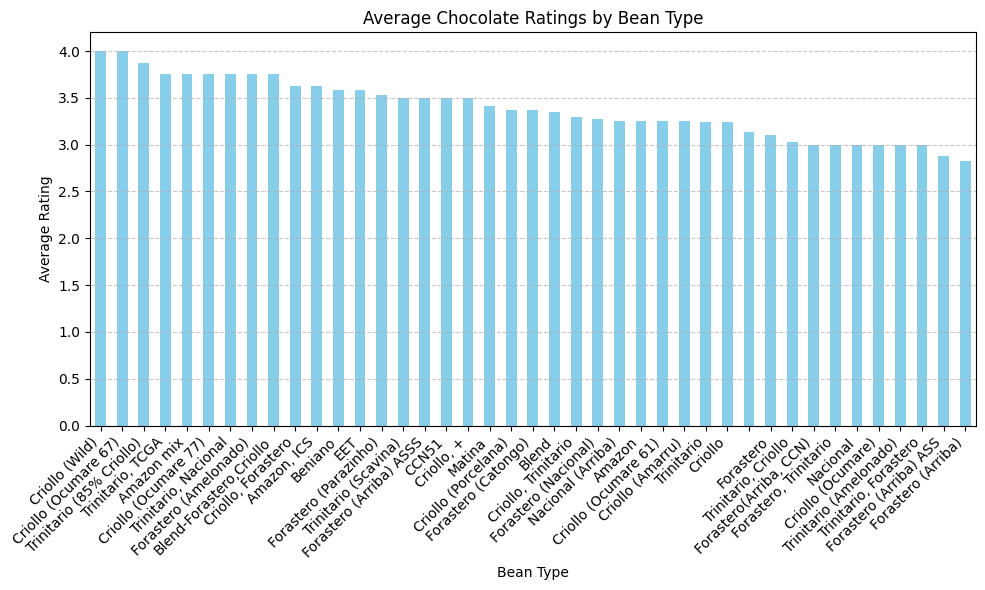

In [32]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bean_type_ratings.plot(kind='bar', color='skyblue')
plt.xlabel('Bean Type')
plt.ylabel('Average Rating')
plt.title('Average Chocolate Ratings by Bean Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# Step 1: Group the data by Bean_Type and calculate average rating
ratings_by_bean_type = cacao_fl.groupby('Bean_Type')['Rating'].mean().sort_values()


In [34]:
# Limit the number of bean types displayed
top_n = 10  # Change this number to display more or fewer bean types
top_ratings_by_bean_type = ratings_by_bean_type.tail(top_n)

In [35]:
# Aggregate less frequent bean types into an "Other" category
other_rating = ratings_by_bean_type.head(len(ratings_by_bean_type) - top_n).mean()
top_ratings_by_bean_type['Other'] = other_rating


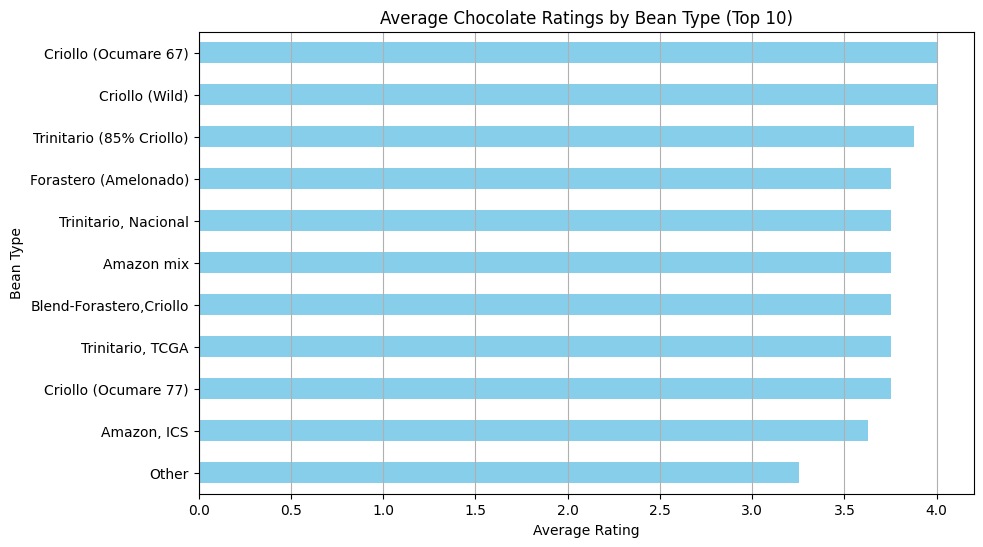

In [36]:
# Step 2: Visualize the average ratings
plt.figure(figsize=(10, 6))

# Sort the data in ascending order to ensure "Other" category is at the bottom
top_ratings_by_bean_type_sorted = top_ratings_by_bean_type.sort_values()

top_ratings_by_bean_type_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Bean Type')
plt.title('Average Chocolate Ratings by Bean Type (Top {})'.format(top_n))
plt.grid(axis='x')
plt.show()

What are the average ratings by different origins?

In [37]:
# Calculate the average rating for each origin
avg_rating_by_origin = cacao_fl.groupby('Broad_Bean_Origin ')['Rating'].mean().reset_index()

In [38]:
# Sort the data by average rating
avg_rating_by_origin = avg_rating_by_origin.sort_values(by='Rating', ascending=False)

In [39]:
# Choose the top N origins to display
top_n = 10
top_n_origins = avg_rating_by_origin.head(top_n)


C:\Users\Andy\AppData\Local\Temp\ipykernel_32276\1512109256.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Broad_Bean_Origin ', data=top_n_origins, ci=None)


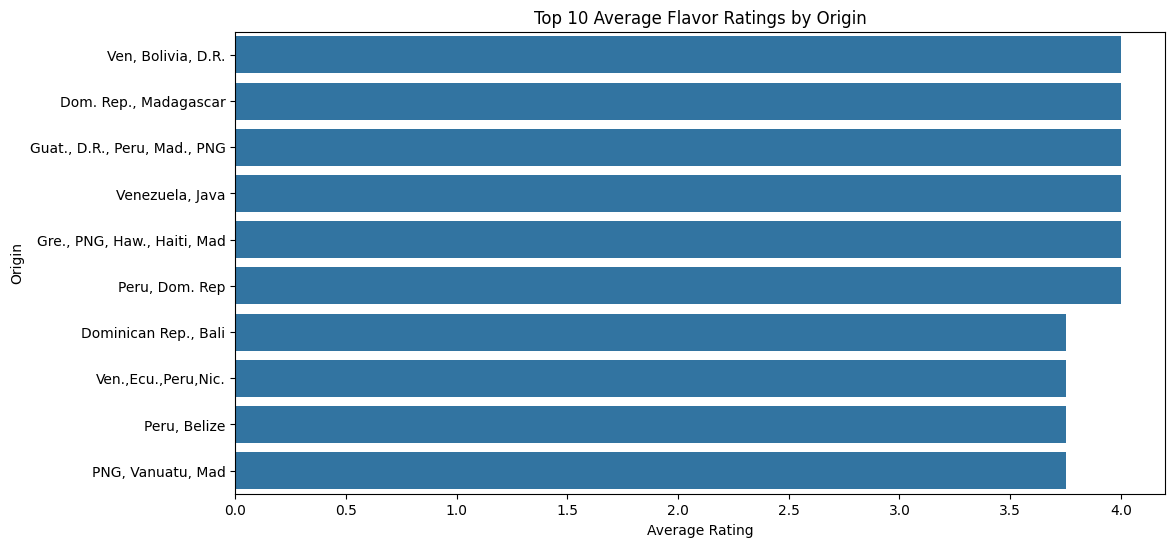

In [40]:
# Plot the average flavor ratings for top N origins
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Broad_Bean_Origin ', data=top_n_origins, ci=None)
plt.title(f"Top {top_n} Average Flavor Ratings by Origin")
plt.xlabel("Average Rating")
plt.ylabel("Origin")
plt.show()

4. How does the aftermelt experience vary among chocolate bars with different flavor ratings?

In [41]:
cacao_fl_ratings = {
    'Rating': [3, 4, 5, 3, 4, 5, 2, 3, 4],
    'Aftermelt': [2, 3, 4, 2, 3, 3, 1, 2, 3]
}

In [42]:
# Convert data to DataFrame
cacao_fl_ratings = pd.DataFrame(cacao_fl_ratings)


In [43]:
# Step 1: Group the data by flavor rating
grouped_data = cacao_fl_ratings.groupby('Rating')

In [44]:
# Step 2: Calculate the average aftermelt for each flavor rating group
average_aftermelt = grouped_data['Aftermelt'].mean()

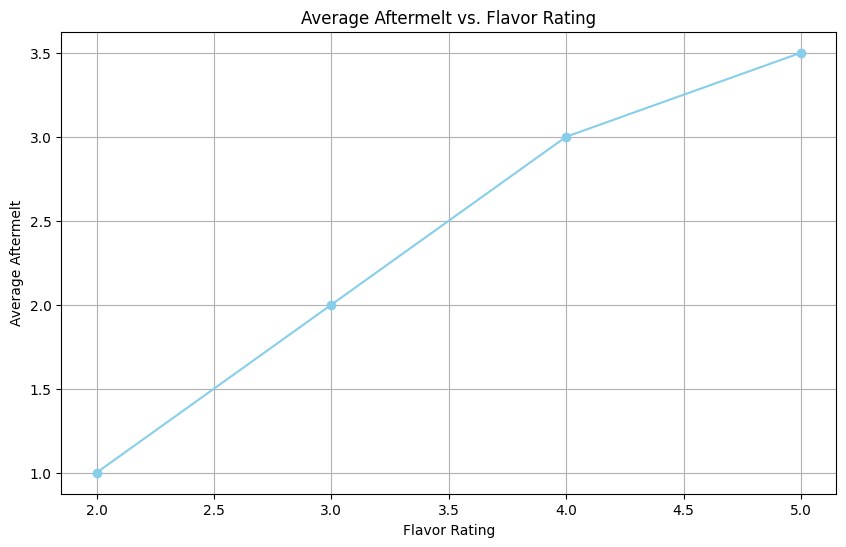

In [45]:
# Step 3: Visualize the relationship
plt.figure(figsize=(10, 6))
plt.plot(average_aftermelt, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Flavor Rating')
plt.ylabel('Average Aftermelt')
plt.title('Average Aftermelt vs. Flavor Rating')
plt.grid(True)
plt.show()

In [46]:
# Group by 'Rating' and calculate the mean of 'Cocoa_Percent'
df_grouped = cacao_fl.groupby('Rating')['Cocoa_Percent'].mean()


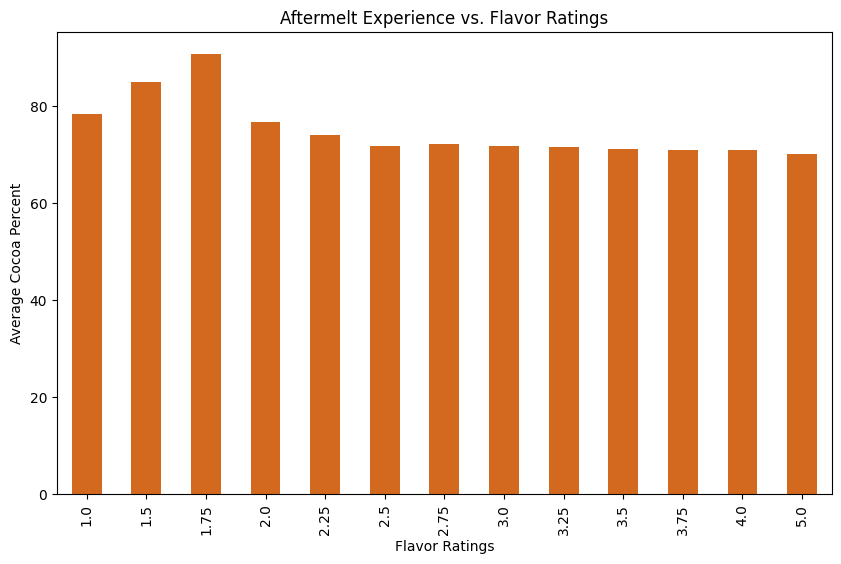

In [47]:
# Create a bar plot
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', color='chocolate')
plt.title('Aftermelt Experience vs. Flavor Ratings')
plt.xlabel('Flavor Ratings')
plt.ylabel('Average Cocoa Percent')
plt.show()

6. What is the relationship between the percentage of cocoa and the flavor intensity of chocolate?

In [48]:
# Define the cocoa percentage ranges
cocoa_ranges = [(0, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]


In [49]:
# Function to categorize cocoa percentage into ranges
def categorize_cocoa(cocoa_percent):
    for range_start, range_end in cocoa_ranges:
        if range_start <= cocoa_percent < range_end:
            return f"{range_start}-{range_end}%"
    return f"{cocoa_ranges[-1][0]}+"

In [50]:
# Apply the function to create a new column for cocoa percentage ranges
cacao_fl['Cocoa_Percent_Range'] = cacao_fl['Cocoa_Percent'].apply(categorize_cocoa)

In [51]:
# Group the data by cocoa percentage ranges and calculate the average flavor intensity rating
average_ratings_by_cocoa_range = cacao_fl.groupby('Cocoa_Percent_Range')['Rating'].mean()

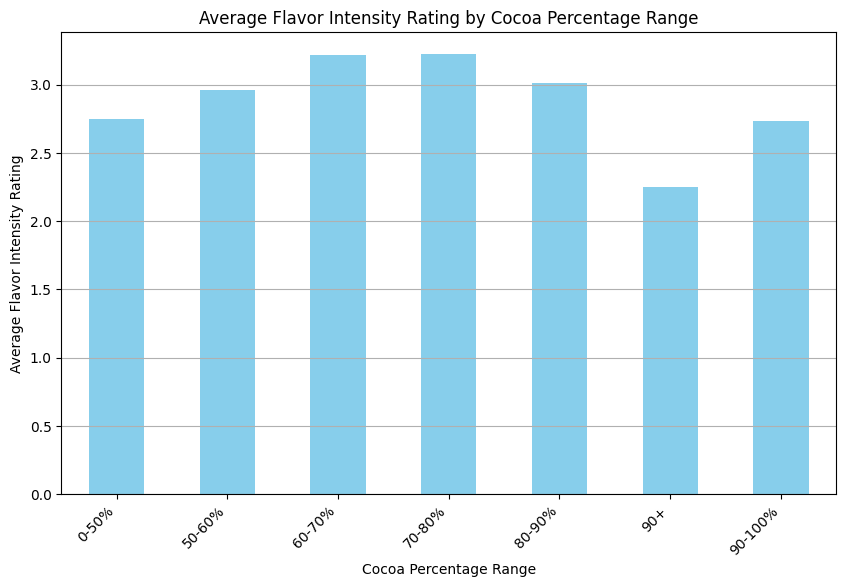

In [52]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_ratings_by_cocoa_range.plot(kind='bar', color='skyblue')
plt.title('Average Flavor Intensity Rating by Cocoa Percentage Range')
plt.xlabel('Cocoa Percentage Range')
plt.ylabel('Average Flavor Intensity Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

What is the average rating throughout the years?

In [53]:
# Group by Review_Date and calculate average rating
average_rating_by_year = cacao_fl.groupby('Review_Date')['Rating'].mean().reset_index()

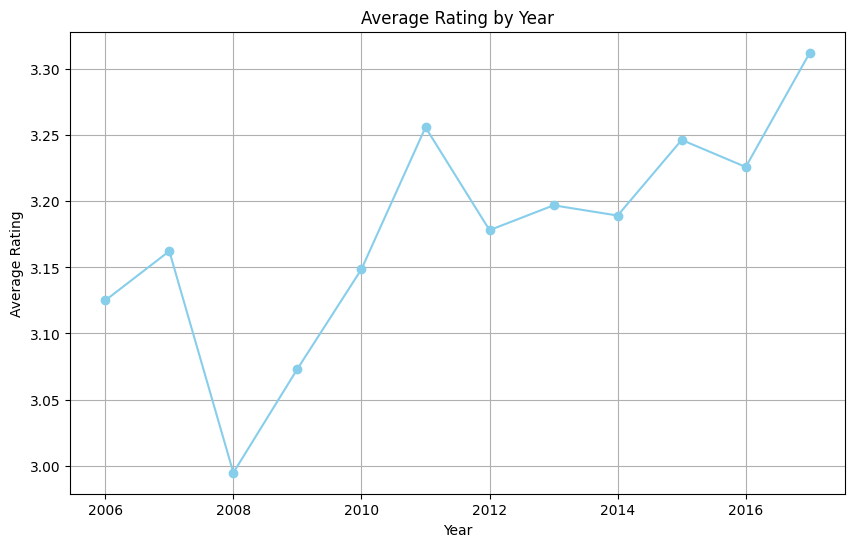

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(average_rating_by_year['Review_Date'], average_rating_by_year['Rating'], marker='o', color='skyblue')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

8. Are there any noticeable patterns in the flavor profiles of chocolates with elite ratings?

In [55]:
# Define elite ratings threshold
elite_threshold = 4.0

In [56]:
# Filter dataset to include only chocolates with elite ratings
elite_chocolates = cacao_fl[cacao_fl['Rating'] >= elite_threshold]

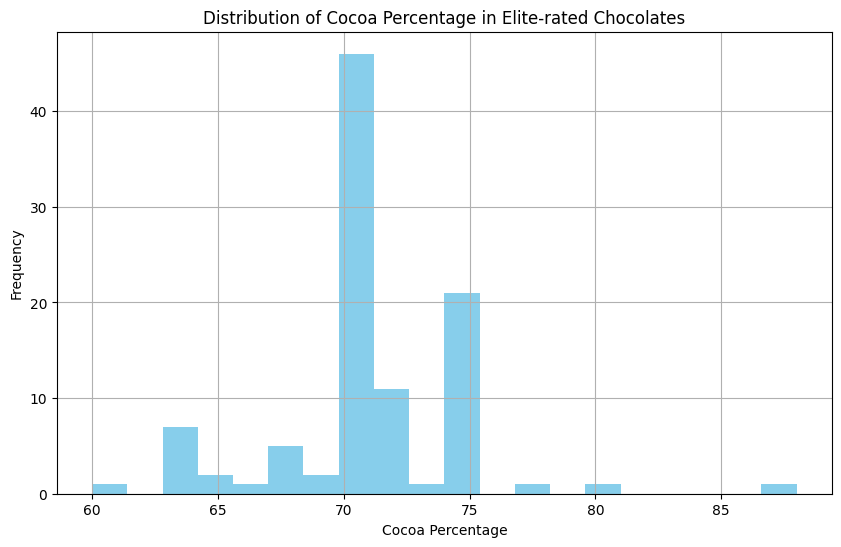

In [57]:
# Explore flavor profiles of elite-rated chocolates
# Example: Plotting distribution of Cocoa_Percent
plt.figure(figsize=(10, 6))
elite_chocolates['Cocoa_Percent'].hist(bins=20, color='skyblue')
plt.title('Distribution of Cocoa Percentage in Elite-rated Chocolates')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


9. How do the ratings of chocolates from different countries compare?

 Which countries produce the highest-rated bars?  I've included both in this chart because it's very similar to each other.

In [58]:
cacao_fl.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Region,Cocoa_Percent_Range
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome,Africa,60-70%
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo,Other,70-80%
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo,Other,70-80%
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo,Other,70-80%
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru,South America,70-80%


In [59]:
# Remove leading/trailing whitespaces
cacao_fl.columns = cacao_fl.columns.str.strip()

In [60]:
# Remove non-printing characters
cacao_fl.columns = cacao_fl.columns.str.encode('ascii', 'ignore').str.decode('ascii')


In [61]:
# Group the data by country of origin and calculate the mean rating
country_ratings = cacao_fl.groupby('Broad_Bean_Origin')['Rating'].mean().sort_values(ascending=False)

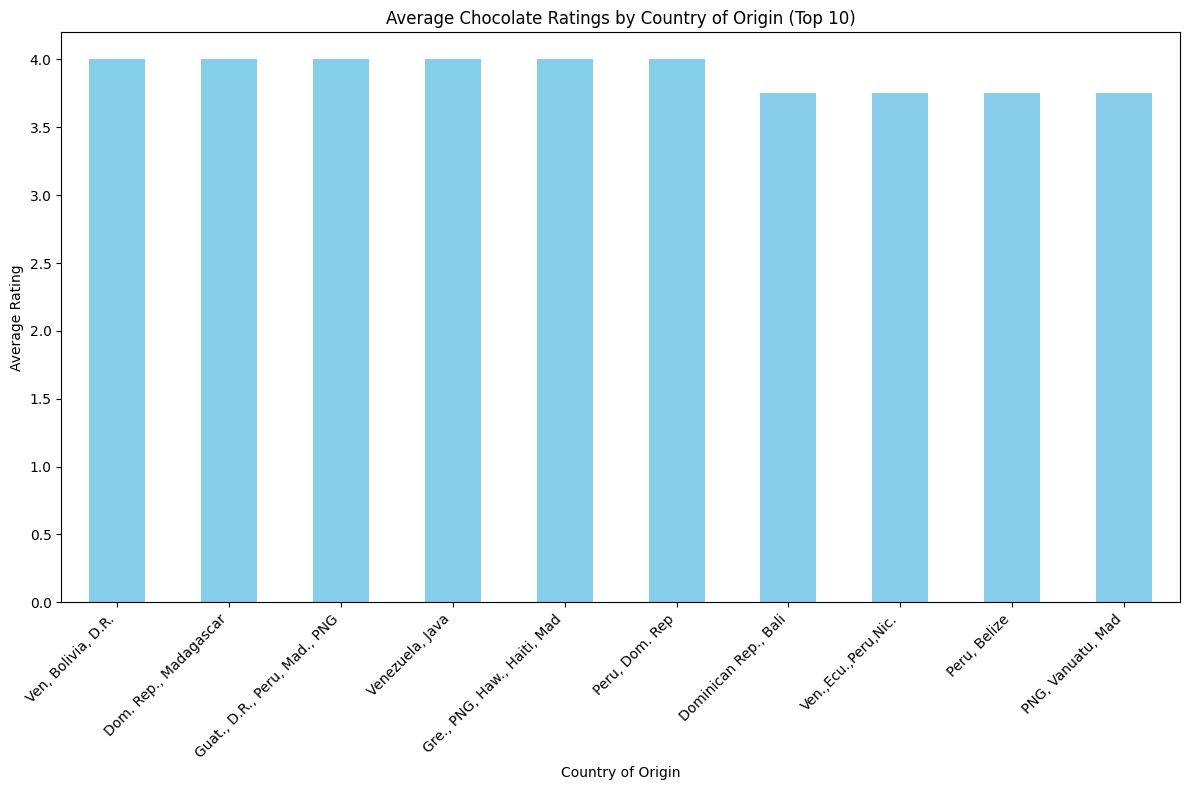

In [62]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
country_ratings.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Country of Origin')
plt.ylabel('Average Rating')
plt.title('Average Chocolate Ratings by Country of Origin (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
# Remove leading and trailing spaces from column names
cacao_fl.columns = cacao_fl.columns.str.strip()

In [64]:
country_ratings = cacao_fl.groupby('Broad_Bean_Origin')['Rating'].mean().sort_values(ascending=False)

In [65]:
cacao_fl.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Region,Cocoa_Percent_Range
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome,Africa,60-70%
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo,Other,70-80%
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo,Other,70-80%
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo,Other,70-80%
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru,South America,70-80%


10. Where are the best cocoa beans grown?

In [66]:
# Group the data by broad bean origin and calculate the average rating
bean_origin_ratings = cacao_fl.groupby('Broad_Bean_Origin')['Rating'].mean()

In [67]:
# Sort the average ratings in descending order
best_bean_origins = bean_origin_ratings.sort_values(ascending=False)

In [68]:
# Select the top 10 bean origins with the highest average ratings
top_origins = bean_origin_ratings.nlargest(10)

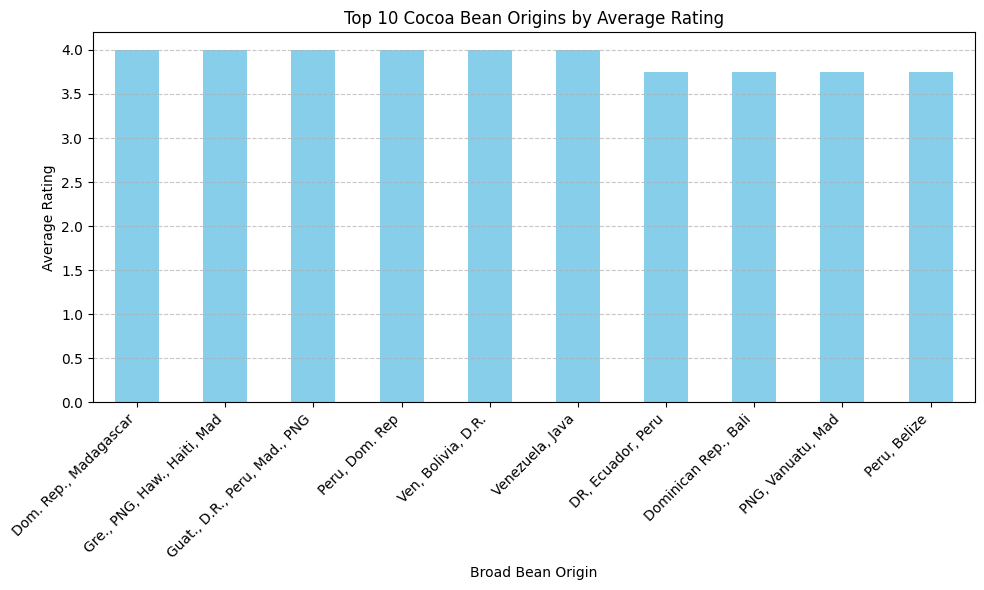

In [69]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_origins.plot(kind='bar', color='skyblue')
plt.xlabel('Broad Bean Origin')
plt.ylabel('Average Rating')
plt.title('Top 10 Cocoa Bean Origins by Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

12. What’s the relationship between cocoa solids percentage and rating? 

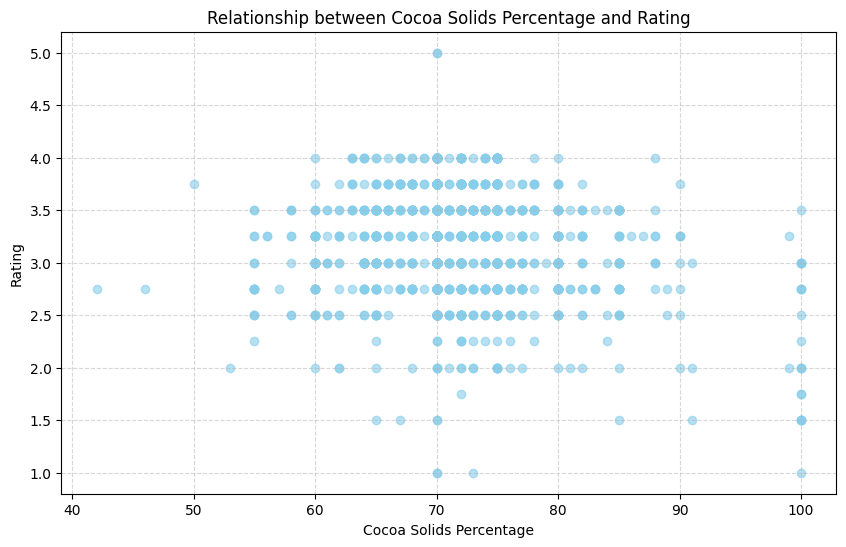

In [70]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cacao_fl['Cocoa_Percent'], cacao_fl['Rating'], color='skyblue', alpha=0.6)
plt.xlabel('Cocoa Solids Percentage')
plt.ylabel('Rating')
plt.title('Relationship between Cocoa Solids Percentage and Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [71]:
cacao_fl.head()

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Region,Cocoa_Percent_Range
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome,Africa,60-70%
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo,Other,70-80%
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo,Other,70-80%
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo,Other,70-80%
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru,South America,70-80%


Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [72]:
# Create a new dataframe with only 'Rating' and 'Cocoa_Percent_Range' columns
new_df = cacao_fl[['Rating', 'Cocoa_Percent_Range']]

In [73]:
# Ensure that 'Cocoa_Percent_Range' is a numeric column
new_df['Cocoa_Percent_Range'] = pd.to_numeric(new_df['Cocoa_Percent_Range'], errors='coerce')

C:\Users\Andy\AppData\Local\Temp\ipykernel_32276\3368134830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cocoa_Percent_Range'] = pd.to_numeric(new_df['Cocoa_Percent_Range'], errors='coerce')


In [74]:
# Drop rows with missing values
new_df = new_df.dropna()

In [75]:
# Calculate the correlation matrix
corr = new_df.corr()

c:\Users\Andy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Andy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


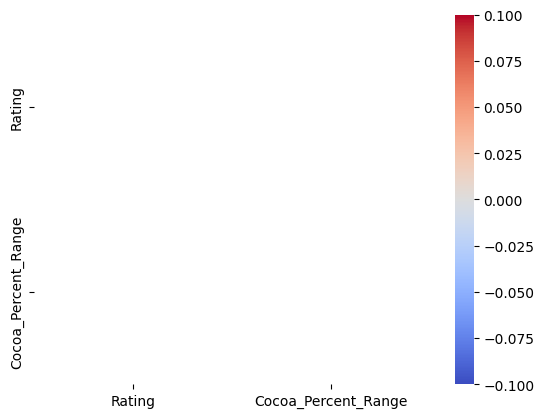

In [76]:
# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

Unfortunately my data set doesn't have enough numeric columns to use the correlation heatmap.

Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Create a categorical plot and interpret the results.

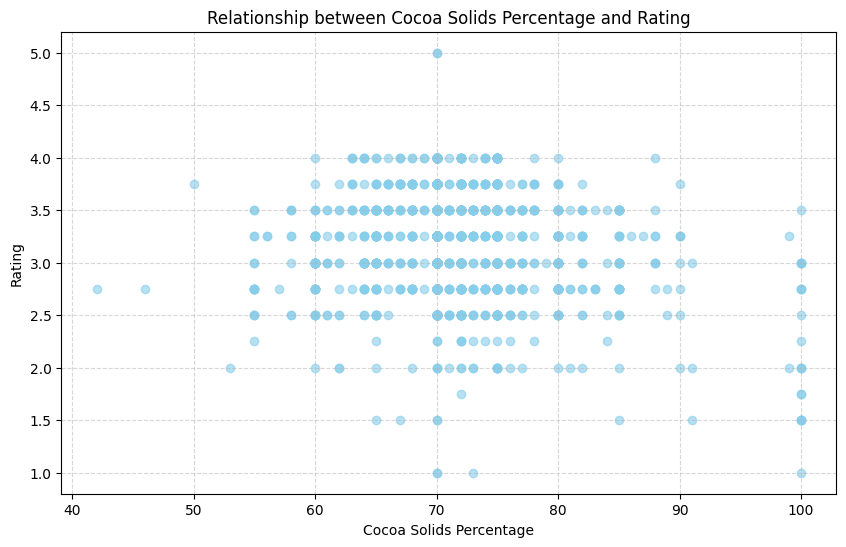

In [77]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cacao_fl['Cocoa_Percent'], cacao_fl['Rating'], color='skyblue', alpha=0.6)
plt.xlabel('Cocoa Solids Percentage')
plt.ylabel('Rating')
plt.title('Relationship between Cocoa Solids Percentage and Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From the scatterplot it seems that the rating goes high when the solids percentage increases. Around 2.5-4.0 ratings is where we see the most correlation between 60-80% solids percentage.

Create a pair plot of the entire data set.


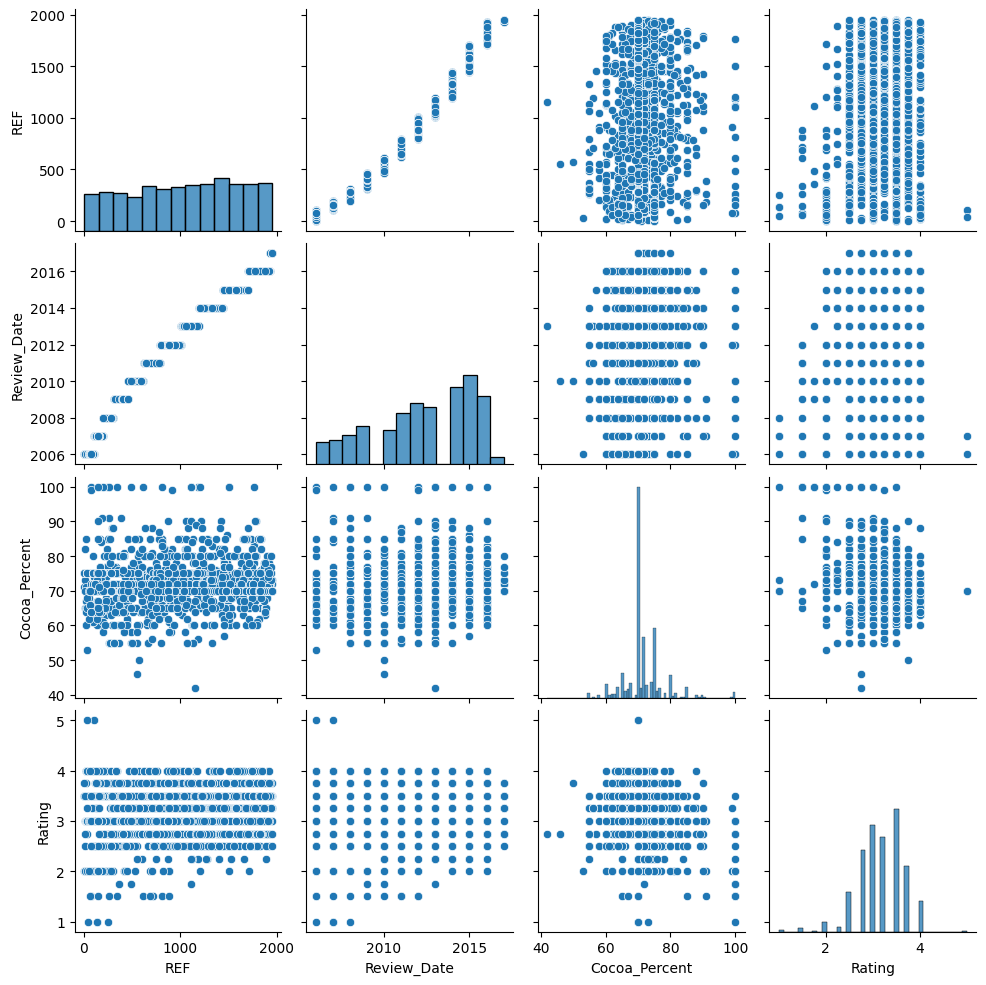

In [78]:
# Create a pair plot of the entire data set
sns.pairplot(cacao_fl)

# Show the plot
plt.show()

At the moment there are no new further explorations. This data set is very limited in terms of numeric data.  I have answered previous questions already in the document the only new finding is the cocoa percentage and rating which I have made a comment of.

Create a choropleth map using a variable of your choice.


In [79]:
# Filter out invalid values (e.g., NaNs) from the 'Cocoa_Percent_Range' column
valid_cocoa_data = cacao_fl.dropna(subset=['Cocoa_Percent_Range'])

In [80]:
# Make sure to replace 'world_geo' with the actual geo data you're using

map03 = folium.Map(location=[37, -97], zoom_start=3.5)

folium.Choropleth(

geo_data=world_geo,
data=valid_cocoa_data,
columns=['Broad_Bean_Origin', 'Cocoa_Percent'],
key_on='feature.properties.name',
fill_color='YlOrBr', fill_opacity=0.6, line_opacity=0.1,
nan_fill_color = 'white',
legend_name="Cocoa_Percent_Range").add_to(map03)
folium.LayerControl().add_to(map03)


map03

6.4 task 
Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

I'd like to test out the relationship between ratings and cacao_percent. 

In [81]:
# Ensure the 'Cocoa_Percent' column is of type string
cacao_fl['Cocoa_Percent'] = cacao_fl['Cocoa_Percent'].astype(str)

In [82]:
# Now try to remove the '%' and convert to float
cacao_fl['Cocoa_Percent'] = cacao_fl['Cocoa_Percent'].str.rstrip('%').astype('float')

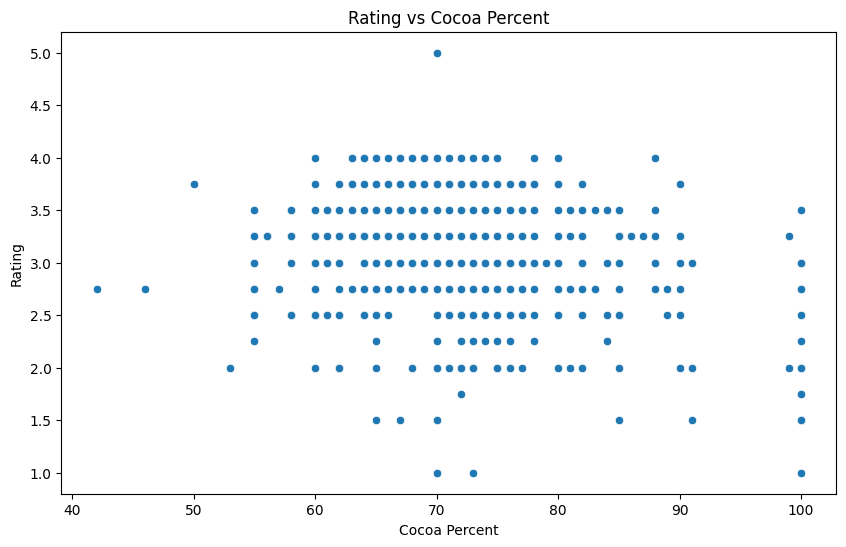

In [83]:
# Create a scatterplot of 'Rating' vs 'Cocoa_Percent'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cocoa_Percent', y='Rating', data=cacao_fl)

plt.title('Rating vs Cocoa Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

State your hypothesis in a markdown cell within your Jupyter notebook.

Based on the initial exploration of the dataset, we can observe that there might be a relationship between the percentage of cocoa in a chocolate bar and its rating. Therefore, we can state our hypothesis as follows:

**H0 (Null Hypothesis):** There is not a significant increase between the percentage of cocoa in a chocolate bar and its rating.

**H1 (Alternative Hypothesis):** There is a significant increase between the percentage of cocoa in a chocolate bar and its rating.

In the next steps, we will perform a statistical test to test these hypotheses.

Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [84]:

# Define X (independent variable) and y (dependent variable)
X = cacao_fl['Cocoa_Percent'].values.reshape(-1,1)
y = cacao_fl['Rating'].values

In [85]:
from sklearn.model_selection import train_test_split

Split the data into two sets: a training set and a test set.


In [86]:
#Splitting data into two sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression


Run a linear regression on the data.
First, fit the model you created to the training set.

In [88]:
# Create a linear regression model
model = LinearRegression()


In [89]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

Then, create a prediction for y on the test set.

In [90]:
# Use the model to predict 'y' for the test set
y_pred = model.predict(X_test)

Create a plot that shows the regression line on the test set.

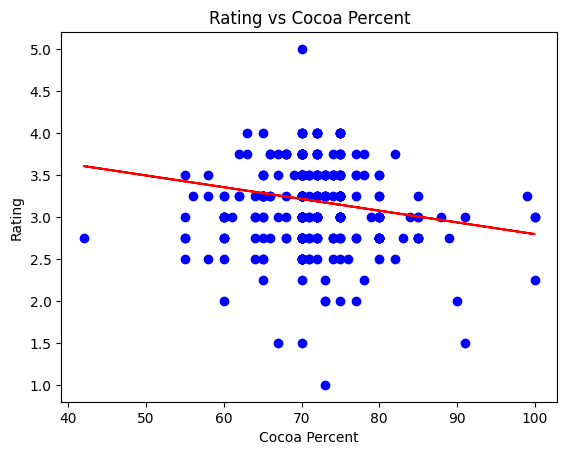

In [91]:

# Create a scatterplot of the test data
plt.scatter(X_test, y_test, color='blue')

# Plot the regression line
plt.plot(X_test, y_pred, color='red')

plt.title('Rating vs Cocoa Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The line appears to have a downward trend might be due to the outlier by the chart it seems rating increases as cocoa_percentage increases to a certian degree.

Check the model performance statistics—MSE and R2 score.

In [92]:
from sklearn.metrics import mean_squared_error, r2_score


In [93]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

In [94]:
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

In [95]:
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.2314840323551636


In [96]:
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: -0.0013893957863839734


In [97]:
# Create a DataFrame with actual and predicted values
df_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [98]:
print(df_compare)

     Actual  Predicted
0      3.00   3.144427
1      3.75   3.214250
2      3.50   3.214250
3      3.50   3.172356
4      3.00   3.214250
..      ...        ...
354    2.00   3.353894
355    2.50   3.214250
356    3.25   3.353894
357    3.50   3.214250
358    3.25   3.214250

[359 rows x 2 columns]


Include your thoughts on how well the model performed on the test set in a markdown cell.

Mean Squared Error (MSE) value of 0.2315 reveals an intriguing insight - our model's forecasts tend to move positively by around 0.2315 units from the actual ratings on average.

The model we've developed shows an R-squared (R2) score of -0.0014. This statistical metric gauges how much of the variability in a dependent variable is accounted for by an independent variable or variables in a regression model. A perfect fit is represented by an R2 score of 1, meaning the predictions align precisely with the data. However, in our scenario, the negative R2 score indicates a deviation from the data trend, the chosen model does not follow the trend of the data. This suggests that our model inadequately captures the fluctuations in the 'Rating' category, implying that 'Cocoa_Percent' might not be a reliable predictor for 'Rating'.

When analyzing data, the presence of bias can have a notable impact on our findings. For instance, if our dataset exhibits bias by favoring chocolate bars with higher ratings over those with lower ratings, our model could excel at predicting the ratings of the more positively rated chocolate bars while struggling with accuracy for the ones rated lower. This discrepancy arises from training the model on an imbalanced dataset that leans towards specific types of data.


In a scenario where bias infiltrates a variable like 'Cocoa_Percent,' where certain cocoa percentages are overrepresented compared to others, our model's predictions may lean towards reflecting the ratings associated with the more commonly represented cocoa percentages.

Given the data and the context, let’s revisit the null and alternative hypotheses:


Null Hypothesis (H0): No significant increase is observed between the cocoa percentage in a chocolate bar and its rating.
Alternative Hypothesis (H1): A notable increase exists between the cocoa percentage in a chocolate bar and its rating.


To evaluate our model's performance, we can look at the Mean Squared Error (MSE) and R-squared (R2) Score in relation to these hypotheses:


MSE: The MSE value of 0.2315 indicates the average squared difference between our model’s predictions and the actual ratings.
Specifically, the positive deviation means that, on average, our model tends to overestimate the ratings by approximately 0.2315.


R2 Score: The negative R2 score (-0.0014) indicates that our model poorly explains the variability in the 'Rating' variable. This inconsistency challenges the alternative hypothesis, suggesting that solely considering cocoa percentage may not effectively predict chocolate bar ratings. 

In summary, based on the current model performance, the null hypothesis (no significant increase) seems more aligned with the data.

6.5

Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

In [99]:
numeric_columns = ['REF', 'Review_Date', 'Cocoa_Percent', 'Rating']

In [100]:
# Create a subset of numeric columns
numeric_data = cacao_fl[numeric_columns]

In [101]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [102]:
# Fit and transform the data
standardized_data = scaler.fit_transform(numeric_data)

Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [103]:
# Create a new DataFrame with standardized data
df_standardized = pd.DataFrame(standardized_data, columns=numeric_columns)

Now 'df_standardized' contains the standardized numeric features

In [104]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [105]:
score = [kmeans[i].fit(df_standardized).score(df_standardized) for i in range(len(kmeans))] # Creates a score that represents 


In [106]:
score

[-7180.000000000004,
 -4539.826697968458,
 -3728.752635620152,
 -3259.381443729353,
 -2734.741064170495,
 -2487.404913436424,
 -2217.5146347578834,
 -2022.7023328786668,
 -1813.4195526900123]

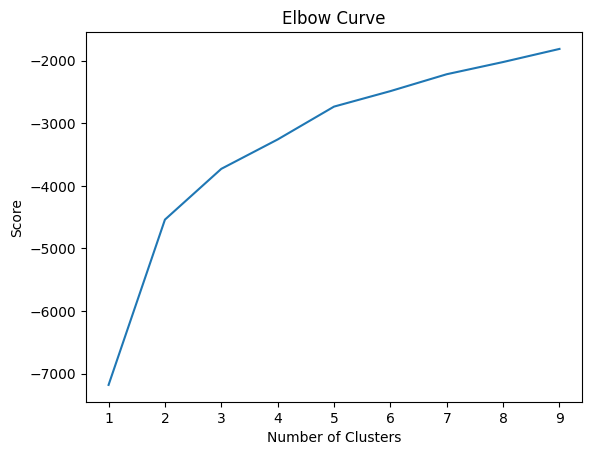

In [107]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [108]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [109]:
# Fit the k-means object to the data.

kmeans.fit(df_standardized)

KMeans(n_clusters=2)

In [110]:
df_standardized['clusters'] = kmeans.fit_predict(df_standardized)

In [111]:
df_standardized.head()

,REF,Review_Date,Cocoa_Percent,Rating,clusters
0,1.519895,1.255692,-1.375655,1.180231,1
1,1.158056,0.913975,-0.268345,-0.912129,1
2,1.158056,0.913975,-0.268345,-0.389039,1
3,1.165293,0.913975,-0.268345,0.657141,1
4,1.208714,0.913975,-0.268345,0.657141,1


In [112]:
df_standardized['clusters'].value_counts()

clusters
1    977
0    818
Name: count, dtype: int64

C:\Users\Andy\AppData\Local\Temp\ipykernel_32276\670965583.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.scatterplot(x=df_standardized['Cocoa_Percent'], y=df_standardized['Rating'], hue=kmeans.labels_, s=100, palette=palette)


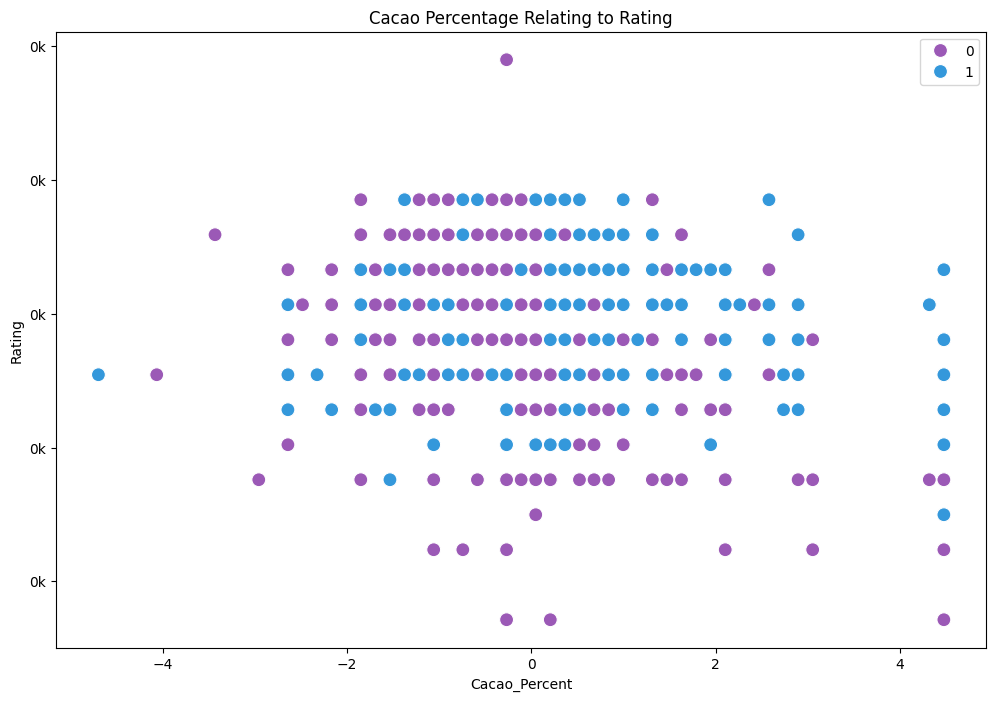

In [113]:
#plotting 
plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# scatterplot 
ax = sns.scatterplot(x=df_standardized['Cocoa_Percent'], y=df_standardized['Rating'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('Cacao_Percent')
plt.ylabel('Rating')

# title 
plt.title('Cacao Percentage Relating to Rating')

# assigning names to clusters based on the label
df_standardized.loc[df_standardized['clusters'] == 2, 'cluster'] = 'dark purple'
df_standardized.loc[df_standardized['clusters'] == 1, 'cluster'] = 'blue'
df_standardized.loc[df_standardized['clusters'] == 0, 'cluster'] = 'green'

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
plt.show()
